## Generating dataset

In [1]:
clear_grouping1 = [(1,1), (1,2), (2,1), (2,2), (4,4), (5,5), (4,5), (5,4)]
clear_grouping2 = [(1,5), (1,4), (2,5), (2,4), (4,1), (5,1), (4,2), (5,2)]
density_change = [(1,1), (1,3), (2,1), (2,3), (4,4), (5,4), (4,6), (5,6)]
split_up = [(2,1), (2,2), (3,1), (3,2), (2,4), (2,5), (3,4), (3,5)]
neighborhood = [(2,1), (3,2), (5,3), (6,4), (1,5), (2,6), (4,6), (5,7)]
positive = [(1,1), (2,2), (3,3), (4,4), (5,5), (6,6)]
negative = [(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)]


In [2]:
non_linear = [(1,1), (2,2), (3,3), (4,4), (5,3), (6,2), (7,1)]
outliers = [(1,1), (1,2), (2,1), (2,2), (6,6)]
variance = [(1,3), (2,2), (3,4), (4,3), (5,2), (6,4), (7,3)]
skewness = [(1,1), (1,3), (1,5), (2,2), (2,4), (3,3), (5,3)]
fan = [(3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7)]
clutter = [(1,1), (2,4), (3,1), (3,5), (4,2), (5,4), (6,3)]

In [3]:
import seaborn as sns

In [78]:
charts = [clear_grouping1, clear_grouping2, density_change, split_up, neighborhood, positive, negative, non_linear, outliers, variance, skewness, fan, clutter]
chart_names = ['clear_grouping1', 'clear_grouping2', 'density_change', 'split_up', 'neighborhood', 'positive', 'negative', 'non_linear', 'outliers', 'variance', 'skewness', 'fan', 'clutter']

In [5]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

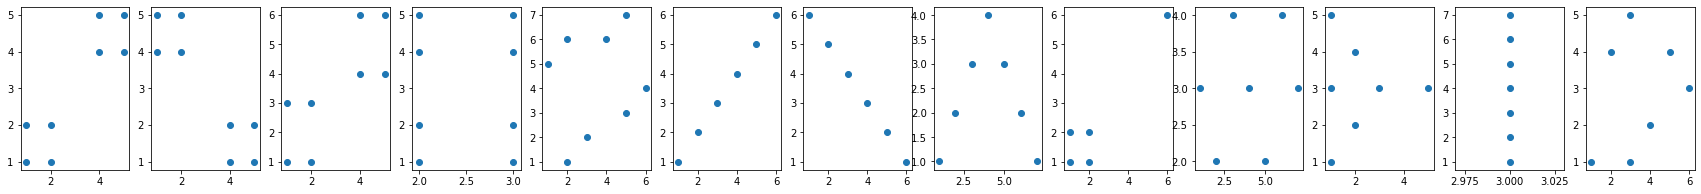

In [6]:
f = plt.figure()
plt.rcParams['figure.figsize'] = (30, 3)
f,axes = plt.subplots(nrows=1, ncols=13)
for i,chart in enumerate(charts):
    x = [cur_x for cur_x,_ in chart]
    y = [cur_y for _,cur_y in chart]
    axes[i].scatter(x,y)

In [74]:
import plotly.express as px

In [79]:
for chart, name in zip(charts, chart_names):
    fig = px.parallel_coordinates(chart)
    fig.write_image(name+'pcp.png')

In [9]:
import math
import numpy as np
def ToPolar(x,y):
    rho = np.sqrt(x**2 + y**2)
    phi = math.degrees(np.arctan2(y, x))
    return(rho, phi)

<Figure size 2160x144 with 0 Axes>

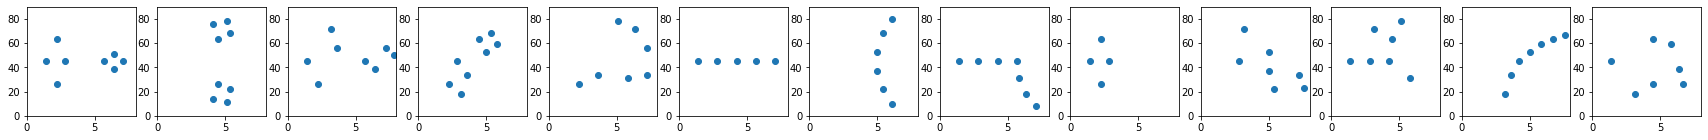

In [11]:
f = plt.figure()
plt.rcParams['figure.figsize'] = (30, 2)
f,axes = plt.subplots(nrows=1, ncols=13)
for i,chart in enumerate(charts):
    polars = [ToPolar(cur_x, cur_y) for cur_x,cur_y in chart]
    x = [cur_x for cur_x, _ in polars]
    y = [cur_y for _,cur_y in polars]
    axes[i].scatter(x,y)
    axes[i].set_xlim([0,8])
    axes[i].set_ylim([0, 90])

<Figure size 2160x144 with 0 Axes>

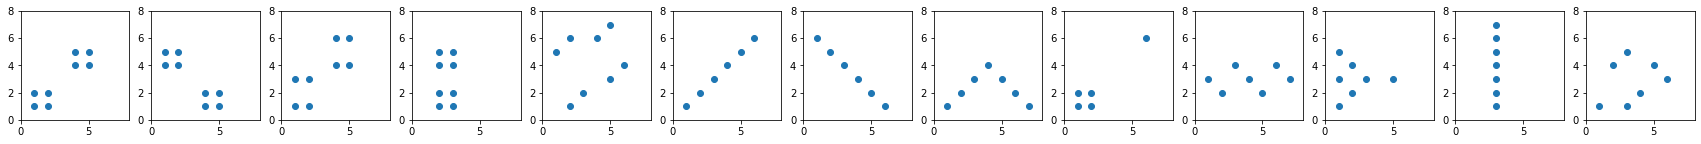

In [12]:
f = plt.figure()
plt.rcParams['figure.figsize'] = (30, 2)
f,axes = plt.subplots(nrows=1, ncols=13)
for i,chart in enumerate(charts):
    x = [cur_x for cur_x,_ in chart]
    y = [cur_y for _,cur_y in chart]
    axes[i].scatter(x,y)
    axes[i].set_xlim([0,8])
    axes[i].set_ylim([0,8])


In [13]:
import math

In [14]:
def getThetaPhi(x1,y1,x2,y2):
    m = (y2-y1)/(x2-x1)
    c = -1*m*x1+y1
    x_closest = (-1*m*c)/(m*m+1)
    y_closest = c/(m*m+1)
    phi = math.sqrt(x_closest**2 + y_closest**2)
    theta = math.degrees(np.arctan2(y_closest, x_closest))
    return (phi, theta)

<Figure size 2160x144 with 0 Axes>

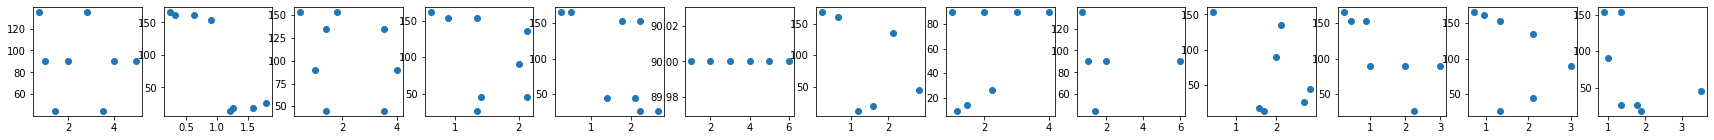

In [15]:
f = plt.figure()
plt.rcParams['figure.figsize'] = (30, 2)
f,axes = plt.subplots(nrows=1, ncols=13)
for i,chart in enumerate(charts):
    polars = [getThetaPhi(0,cur_x, 1,cur_y) for cur_x,cur_y in chart]
    x = [cur_x for cur_x, _ in polars]
    y = [cur_y for _,cur_y in polars]
    axes[i].scatter(x,y)
#     axes[i].set_xlim([0,8])
#     axes[i].set_ylim([0, 100])

## Experimenting with Hough Transforms

In [37]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data
from skimage import io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from matplotlib import cm

In [39]:
# Constructing test image
image = io.imread('pcp.png')

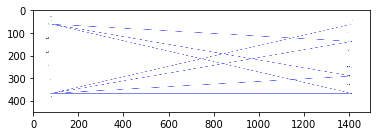

In [40]:
io.imshow(image)

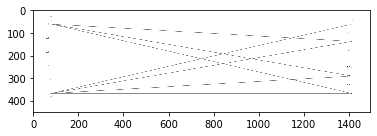

In [44]:
image = rgb2gray(image)
io.imshow(image)

In [45]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html

In [55]:
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

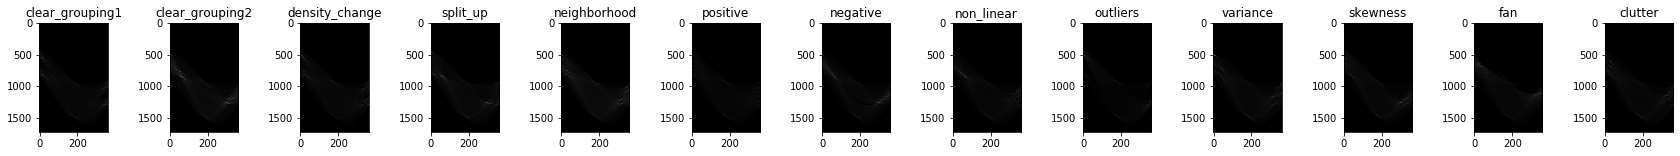

In [100]:
fig, axes = plt.subplots(1, 13)
ax = axes.ravel()

for i, names in enumerate(chart_names):
    image = io.imread(names+'pcp.png')
    image = rgb2gray(image)
    image = canny(image)
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    h, theta, d = hough_line(image, theta=tested_angles)
    angle_step = 0.5 * np.diff(theta).mean()
    d_step = 0.5 * np.diff(d).mean()
    bounds = [np.rad2deg(theta[0] - angle_step),
              np.rad2deg(theta[-1] + angle_step),
              d[-1] + d_step, d[0] - d_step]
#     ax[i].imshow(np.log(1+h), aspect=0.5/1.5, cmap=cm.gray)
    ax[i].imshow(h, aspect=0.5/1.5, cmap=cm.gray)
    ax[i].set_title(names)
#     ax[i].imshow(edges)
#     ax[i].set_title(names)
    